In [59]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
def plotting(img):
  plt.figure(figsize = (15,2))
  plt.imshow(img)

In [61]:
def extract_preprocess(raw_data):

  # data loading and reshaping
  fo = open(raw_data, 'rb')
  dict = pickle.load(fo, encoding ='bytes')
  X = dict[b'data']
  y = np.array(dict[b'labels'])
  X = X.reshape(len(X),3,32,32).transpose(0,2,3,1)

  fo.close()
  return X,y

In [62]:
data_batch = ["/content/data_batch_1","/content/data_batch_2","/content/data_batch_3"]
test_data = "/content/test_batch"
train_X = []
train_y = []

for i in data_batch:
  X,y = extract_preprocess(i)
  train_X.append(X)
  train_y.append(y)

val_X,val_y = extract_preprocess(test_data)

In [63]:
testing_data = np.load('/content/test_additional.npy')
testing_y = np.load('/content/labels.npy')


In [64]:
# concat all trining data batches
x_train = np.concatenate((train_X[0], train_X[1], train_X[2]), axis=0)
y_train = np.concatenate((train_y[0], train_y[1], train_y[2]), axis=0)
y_train.shape

(30000,)

In [65]:
#normalize all data
x_train = x_train/255.
testing_data = testing_data/255.
val_X = val_X/255.

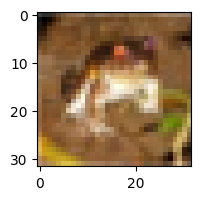

In [66]:
#checking if preprocessing done correctly
plotting(train_X[0][0])

In [67]:
#finding unique classes
labels = list(set(train_y[0]).union(set(train_y[1]).union(set(train_y[2]))))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [68]:
# Define the architecture of the CNN (sigmoid)
def create_sigmoid_cnn(input_shape):
    model_sigmoid = models.Sequential()
    model_sigmoid.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=input_shape))
    model_sigmoid.add(layers.MaxPooling2D((2, 2)))
    model_sigmoid.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
    model_sigmoid.add(layers.MaxPooling2D((2, 2)))
    model_sigmoid.add(layers.Flatten())
    model_sigmoid.add(layers.Dense(64, activation='sigmoid'))
    model_sigmoid.add(layers.Dense(10, activation='softmax'))
    return model_sigmoid

In [69]:
# Define the architecture of the CNN (relu)
def create_relu_cnn(input_shape):
    model_relu = models.Sequential()
    model_relu.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model_relu.add(layers.MaxPooling2D((2, 2)))
    model_relu.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_relu.add(layers.MaxPooling2D((2, 2)))
    model_relu.add(layers.Flatten())
    model_relu.add(layers.Dense(64, activation='relu'))
    model_relu.add(layers.Dense(10, activation='softmax'))
    return model_relu

In [70]:
model_relu = create_relu_cnn(input_shape=x_train[0].shape)
model_sigmoid = create_sigmoid_cnn(input_shape=x_train[0].shape)


In [71]:
# Compile the sigmoid CNN
model_sigmoid.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the relu CNN
model_relu.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model_relu.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(val_X, val_y))

Epoch 1/15
469/469 [==============================] - 56s 116ms/step - loss: 1.6403 - accuracy: 0.4039 - val_loss: 1.3521 - val_accuracy: 0.5220
Epoch 2/15
469/469 [==============================] - 54s 115ms/step - loss: 1.2772 - accuracy: 0.5489 - val_loss: 1.2864 - val_accuracy: 0.5551
Epoch 3/15
469/469 [==============================] - 55s 117ms/step - loss: 1.1380 - accuracy: 0.6004 - val_loss: 1.1159 - val_accuracy: 0.6090
Epoch 4/15
469/469 [==============================] - 55s 118ms/step - loss: 1.0462 - accuracy: 0.6347 - val_loss: 1.0422 - val_accuracy: 0.6454
Epoch 5/15
469/469 [==============================] - 54s 115ms/step - loss: 0.9882 - accuracy: 0.6549 - val_loss: 1.0315 - val_accuracy: 0.6452
Epoch 6/15
469/469 [==============================] - 55s 117ms/step - loss: 0.9371 - accuracy: 0.6744 - val_loss: 1.0405 - val_accuracy: 0.6408
Epoch 7/15
469/469 [==============================] - 54s 115ms/step - loss: 0.8936 - accuracy: 0.6903 - val_loss: 1.0173 - val_ac

In [73]:
model_sigmoid.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(val_X, val_y))

Epoch 1/15
938/938 [==============================] - 39s 41ms/step - loss: 2.1138 - accuracy: 0.2174 - val_loss: 1.9413 - val_accuracy: 0.3195
Epoch 2/15
938/938 [==============================] - 36s 39ms/step - loss: 1.8860 - accuracy: 0.3188 - val_loss: 1.8213 - val_accuracy: 0.3464
Epoch 3/15
938/938 [==============================] - 36s 39ms/step - loss: 1.7546 - accuracy: 0.3718 - val_loss: 1.6992 - val_accuracy: 0.3953
Epoch 4/15
938/938 [==============================] - 36s 39ms/step - loss: 1.6652 - accuracy: 0.4020 - val_loss: 1.6475 - val_accuracy: 0.4055
Epoch 5/15
938/938 [==============================] - 38s 40ms/step - loss: 1.5925 - accuracy: 0.4273 - val_loss: 1.5751 - val_accuracy: 0.4285
Epoch 6/15
938/938 [==============================] - 37s 39ms/step - loss: 1.5306 - accuracy: 0.4494 - val_loss: 1.5106 - val_accuracy: 0.4542
Epoch 7/15
938/938 [==============================] - 38s 41ms/step - loss: 1.4787 - accuracy: 0.4698 - val_loss: 1.4931 - val_accuracy:

In [83]:
predictions_sigmoid = model_sigmoid.predict(testing_data)
predicted_classes_sigmoid = np.argmax(predictions_sigmoid, axis=1)


313/313 [==============================] - 3s 10ms/step


In [85]:
conf_matrix = confusion_matrix(testing_y, predicted_classes_sigmoid)
conf_matrix

array([[659,  58,  36,  12,  15,  13,  17,  16, 104,  70],
       [ 34, 734,   6,   4,   4,  11,  10,  10,  35, 152],
       [ 96,  25, 365,  66,  81, 114, 109,  79,  22,  43],
       [ 43,  23,  55, 276,  32, 279, 117,  83,  22,  70],
       [ 61,  18, 144,  42, 319,  92, 132, 151,  16,  25],
       [ 23,  14,  60, 142,  32, 521,  51,  99,  21,  37],
       [ 17,  18,  59,  59,  56,  59, 634,  40,  13,  45],
       [ 47,  17,  30,  45,  31, 102,  18, 618,  12,  80],
       [167, 119,   8,  11,   3,  18,  14,   8, 575,  77],
       [ 57, 205,   7,  12,   3,  12,  17,  27,  49, 611]])

In [76]:
# Generate classification report for model_sigmoid
print("Classification Report for model_sigmoid:")
print(classification_report(testing_y, predicted_classes))


Classification Report for model_sigmoid:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60      1000
           1       0.60      0.73      0.66      1000
           2       0.47      0.36      0.41      1000
           3       0.41      0.28      0.33      1000
           4       0.55      0.32      0.40      1000
           5       0.43      0.52      0.47      1000
           6       0.57      0.63      0.60      1000
           7       0.55      0.62      0.58      1000
           8       0.66      0.57      0.62      1000
           9       0.50      0.61      0.55      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.53      0.52     10000



In [77]:
# model_relu.evaluate(testing_data,testing_y)

In [78]:
predictions_relu = model_relu.predict(testing_data)
predicted_classes_relu = np.argmax(predictions_relu, axis=1)


313/313 [==============================] - 5s 15ms/step


In [81]:
conf_matrix_relu = confusion_matrix(testing_y, predicted_classes_relu)
conf_matrix_relu

array([[593,  56,  38,  10,  75,   6,  59,  22,  89,  52],
       [ 13, 810,   1,   4,   5,   7,  23,   5,  17, 115],
       [ 57,  20, 238,  33, 111,  92, 361,  46,  17,  25],
       [ 20,  21,  35, 233,  79, 204, 302,  53,  23,  30],
       [ 17,  15,  21,  14, 473,  34, 353,  52,  12,   9],
       [ 11,   5,  30,  75,  53, 551, 177,  64,  12,  22],
       [  5,  11,   9,  13,   6,  14, 923,   8,   0,  11],
       [ 23,  15,  19,  13,  82,  74,  64, 663,   4,  43],
       [ 88,  80,   5,   7,  42,  15,  37,  13, 656,  57],
       [ 22, 142,   5,   4,   8,   9,  34,  17,  26, 733]])

In [80]:
# Generate classification report for model_relu
print("Classification Report for model_relu:")
print(classification_report(testing_y, predicted_classes_relu))

Classification Report for model_relu:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      1000
           1       0.69      0.81      0.74      1000
           2       0.59      0.24      0.34      1000
           3       0.57      0.23      0.33      1000
           4       0.51      0.47      0.49      1000
           5       0.55      0.55      0.55      1000
           6       0.40      0.92      0.55      1000
           7       0.70      0.66      0.68      1000
           8       0.77      0.66      0.71      1000
           9       0.67      0.73      0.70      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.57     10000
weighted avg       0.61      0.59      0.57     10000

